# Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Data

In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# Visualize Examples

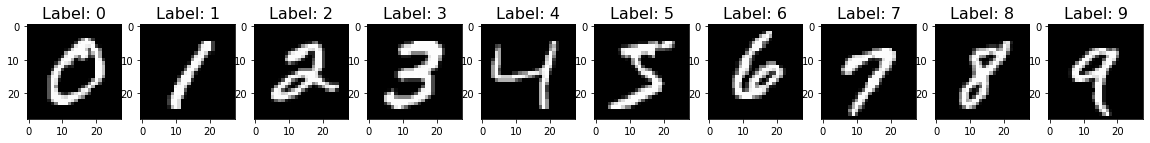

In [ ]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)

In [ ]:
for i in range(10):
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


# Prepare Data

In [ ]:
# Normalize Data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
# Reshape Data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


# Create Model - Fully Connected Neural Network

In [ ]:
model = Sequential()

model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


# Train

In [ ]:
batch_size = 512
epochs=10
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.5856 - accuracy: 0.8287
Epoch 2/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.2214 - accuracy: 0.9356
Epoch 3/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.1636 - accuracy: 0.9521
Epoch 4/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.1283 - accuracy: 0.9626
Epoch 5/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.1055 - accuracy: 0.9686
Epoch 6/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.0893 - accuracy: 0.9726
Epoch 7/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.0760 - accuracy: 0.9773
Epoch 8/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.0679 - accuracy: 0.9790
Epoch 9/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.0594 - accuracy: 0.9818
Epoch 10/10
60000/60000 [==============================

# Evaluate

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

10000/10000 [==============================] - 0s 28us/step
Test Loss: 0.06897685806662776, Test Accuracy: 0.9794999957084656


In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

[[3.4936255e-07 3.7130428e-06 3.2841715e-05 ... 9.9972576e-01
  5.1494209e-07 2.2316651e-06]
 [7.4130571e-06 9.0516638e-05 9.9974030e-01 ... 2.0123055e-08
  1.5009001e-05 2.1155294e-08]
 [1.4873760e-06 9.9716300e-01 1.3872677e-04 ... 1.5569694e-03
  3.8995777e-04 6.5393201e-06]
 ...
 [8.7649941e-09 1.5400502e-09 6.6012959e-11 ... 1.8292833e-06
  3.3011946e-07 9.6722579e-06]
 [1.3450703e-08 2.7892865e-08 8.7136404e-10 ... 8.3635117e-09
  1.2575484e-05 8.8969525e-09]
 [1.1395967e-08 1.3876331e-10 8.7065644e-09 ... 5.8089610e-11
  5.8149058e-10 5.6146909e-10]]
[7 2 1 ... 4 5 6]


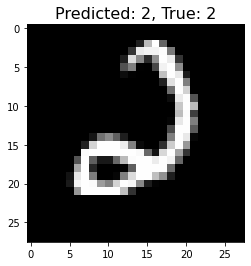

In [ ]:
# Single Example
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

# Confusion Matrix

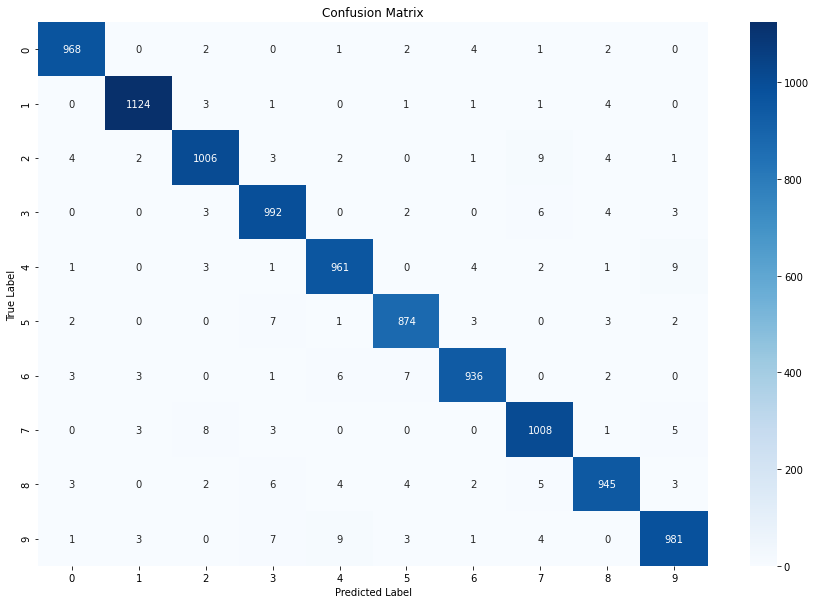

In [ ]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');

# Investigate Some Errors

In [ ]:
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

In [ ]:
y_pred_errors_probability = np.max(y_pred_errors, axis=1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

# Get list of indices of sorted differences
sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:] # 5 last ones

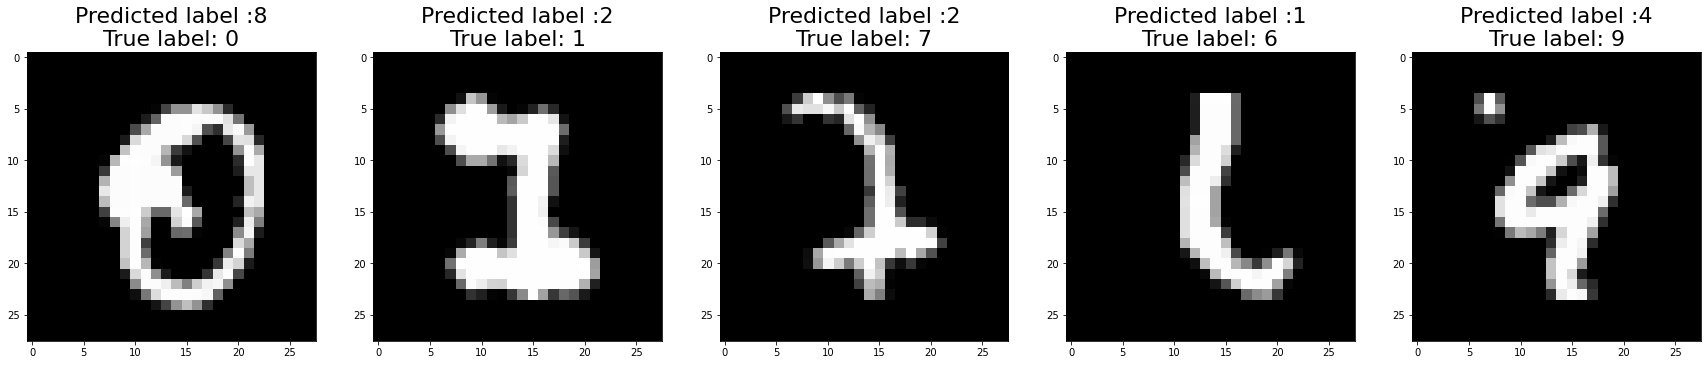

In [ ]:
# Show Top Errors
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize=(30,30))

for i in range(0, num):
  idx = top_idx_diff_errors[i]
  sample = x_test_errors[idx].reshape(28,28)
  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Predicted label :{}\nTrue label: {}".format(y_p, y_t), fontsize=22)